In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

What you see:

The data loads correctly with columns like age, gender, height_cm, weight_kg, body fat_%, diastolic, systolic, gripForce, sit and bend forward_cm, sit-ups counts, broad jump_cm, and class.

info() shows all columns have the expected types: most are floats (continuous), while gender and class are object (categorical).

No missing values are reported.

There are a few duplicate rows, but not a large number.

Interpretation:

The dataset is clean, well-structured, and ready for analysis—no immediate need for imputation or removal of missing data.

The presence of categorical variables (gender, class) and many continuous variables is ideal for feature exploration.

In [8]:
df = pd.read_csv('../../bodyPerformance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [9]:
# Basic info
display(df.head())
display(df.info())
display(df.describe(include='all'))

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


None

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,8467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3349
mean,36.775106,NaN,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627,NaN
std,13.625639,NaN,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000,NaN
min,21.000000,NaN,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,NaN
25%,25.000000,NaN,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,NaN
50%,32.000000,NaN,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,NaN
75%,48.000000,NaN,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,NaN


# 2. Target Variable Analysis

Class distribution plot: The classes (A, B, C, D) are not perfectly balanced. Some classes (often B and C) are more frequent, while A and D are less so.

Class vs. gender plot: Crosstab shows all classes are represented in both genders, but there may be some imbalance (e.g., more males in class A).

Interpretation:

The class imbalance is moderate and should be kept in mind when evaluating classifier performance (accuracy alone may be misleading).

Both genders are represented in all classes, so gender is a potential feature for classification.

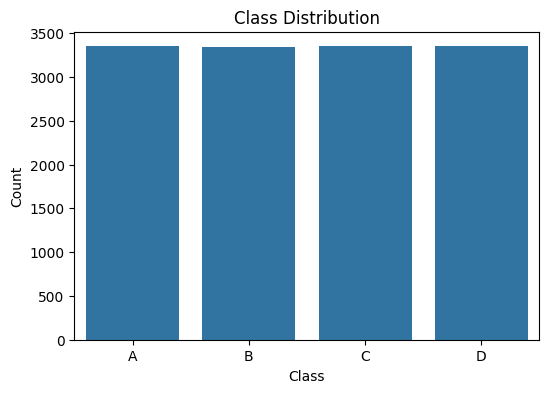

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, order=sorted(df['class'].unique()))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

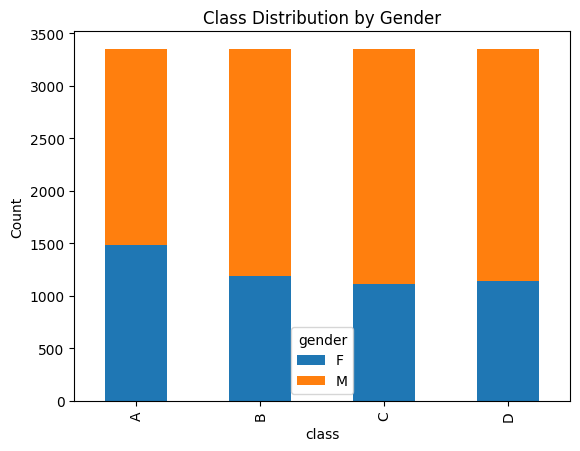

In [11]:
# Crosstab: class vs gender
pd.crosstab(df['class'], df['gender']).plot(kind='bar', stacked=True)
plt.title('Class Distribution by Gender')
plt.ylabel('Count')
plt.show()

# 3. Univariate Feature Analysis

Histograms: Most features (e.g., height_cm, weight_kg, body fat_%) have bell-shaped or slightly skewed distributions. Some features, like sit and bend forward_cm, have a wider spread and even negative values.

Boxplots: Some features (like sit and bend forward_cm, body fat_%, and broad jump_cm) show outliers—values far from the median.

Interpretation:

Outliers exist and could influence model training. Negative values in flexibility tests may reflect measurement below a baseline (not necessarily wrong, but should be checked).

Most features are within plausible physiological ranges, but some (e.g., extremely high/low sit-ups counts) may warrant further investigation.

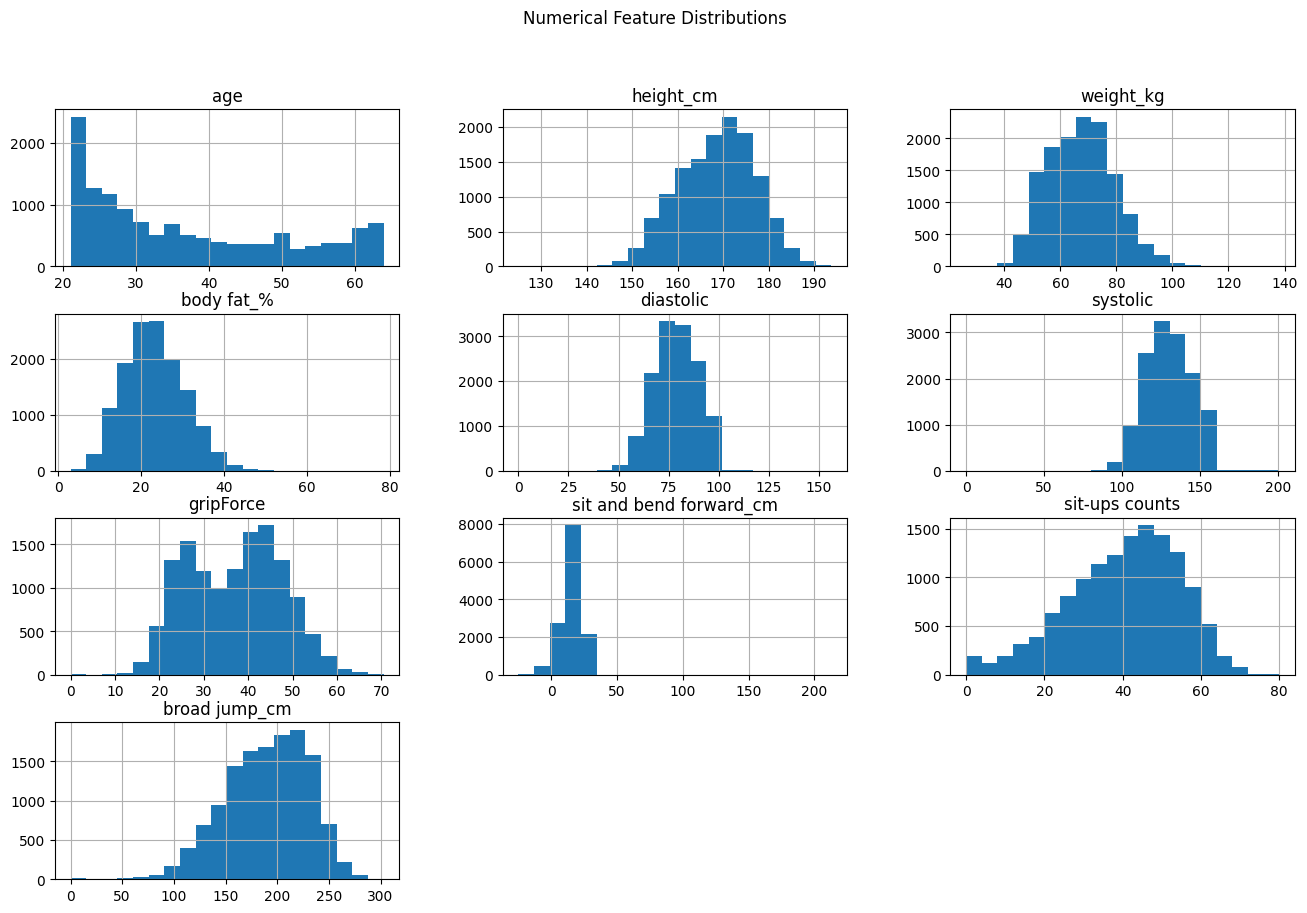

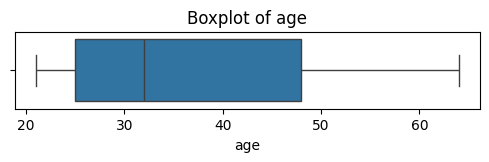

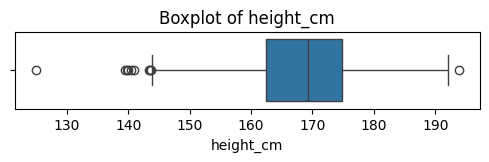

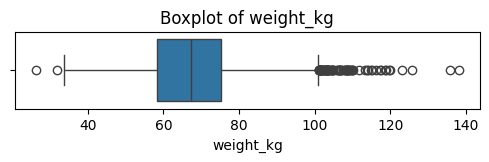

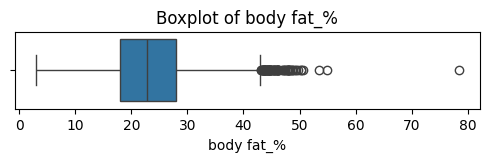

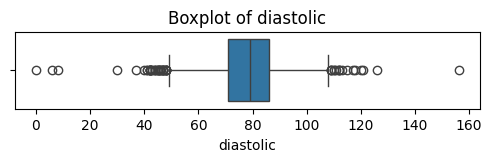

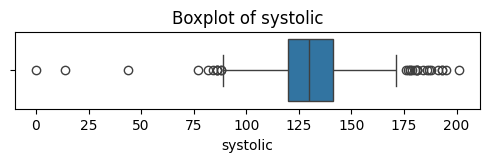

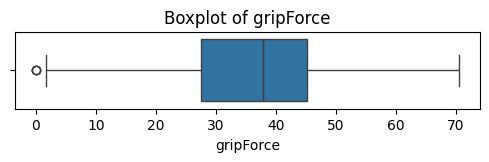

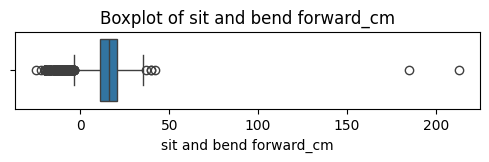

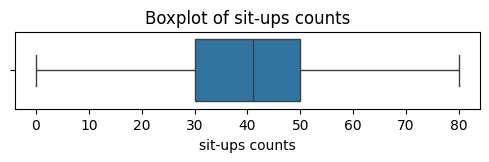

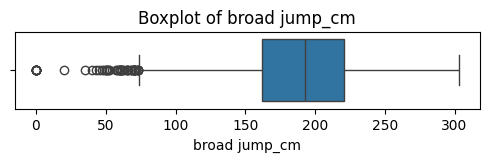

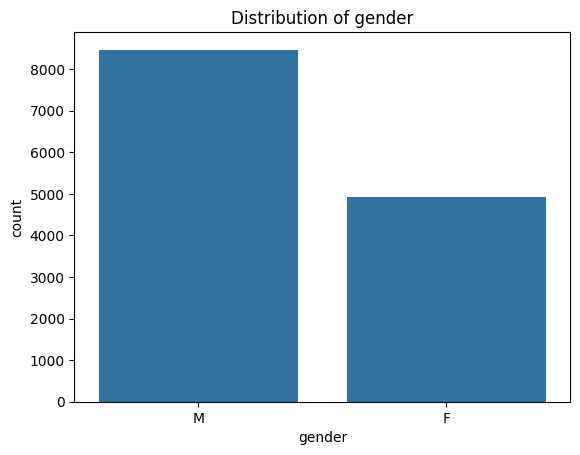

In [14]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('class')  # Exclude target

# Histograms for numerical features
df[num_cols].hist(figsize=(16, 10), bins=20)
plt.suptitle('Numerical Feature Distributions')
plt.show()

# Boxplots for outlier detection
for col in num_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Bar plots for categorical features (here, only gender)
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# 4. Bivariate Analysis: Feature vs. Target

Boxplots/violin plots by class: Features like gripForce, sit-ups counts, and broad jump_cm tend to be higher in class A and lower in class D. Other features (like body fat_%) are higher in lower classes (D).

Some features (e.g., diastolic, systolic) show less separation between classes.

Interpretation:

Physical performance metrics (grip force, sit-ups, broad jump) are strongly associated with class—the higher, the better the class.

Body fat percentage is inversely related to performance class.

Blood pressure features may be less informative for class prediction.

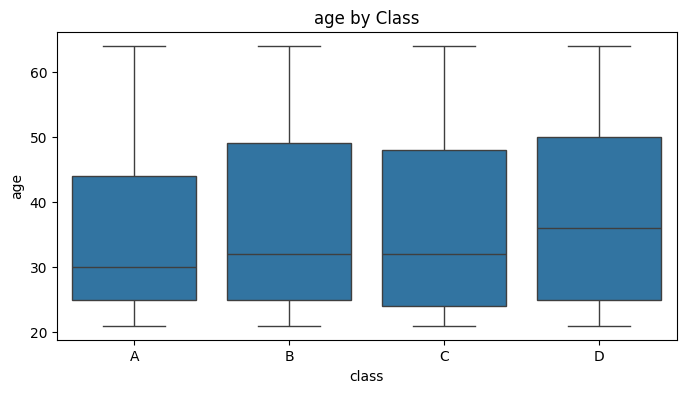

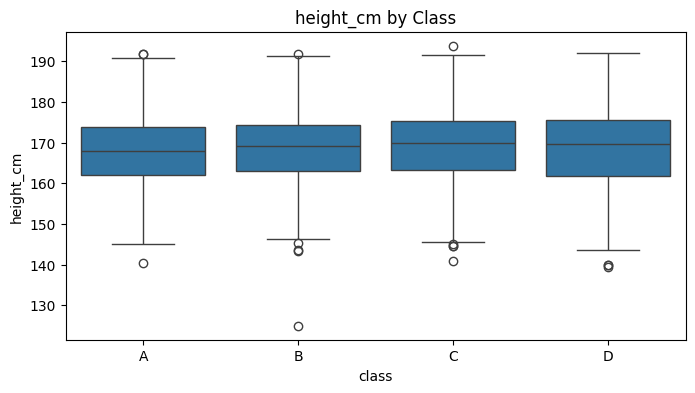

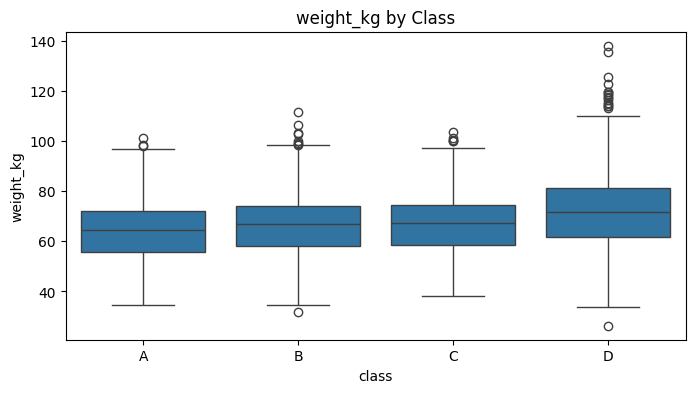

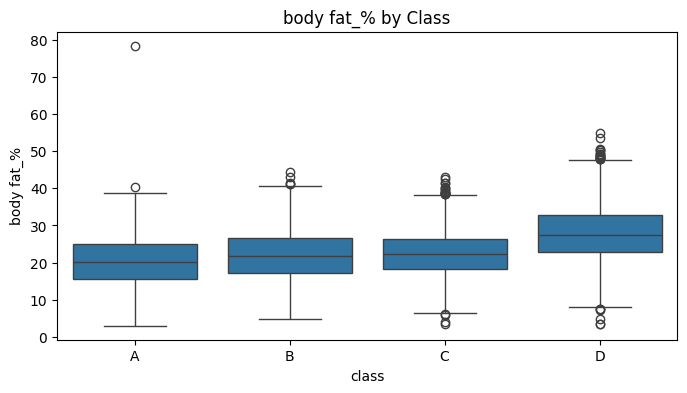

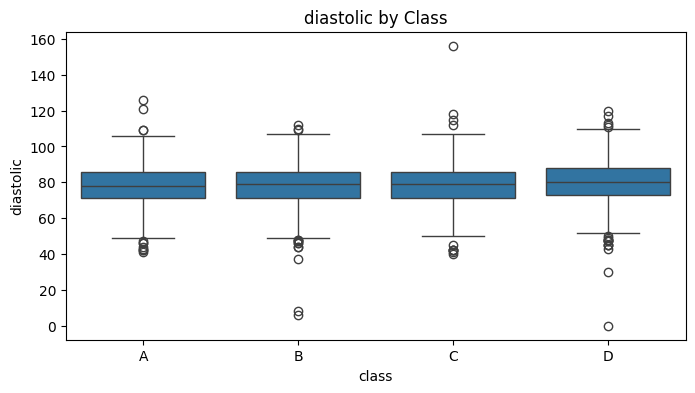

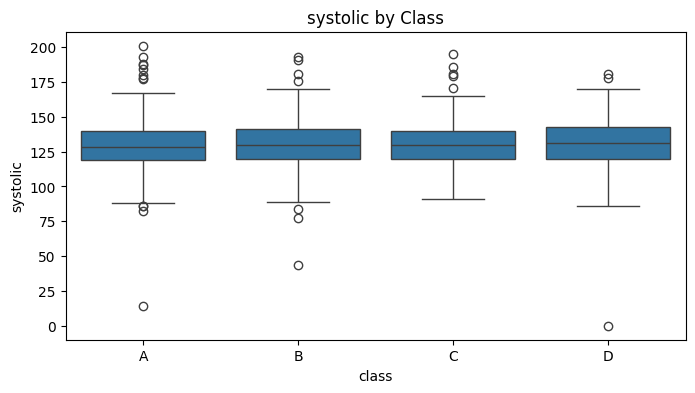

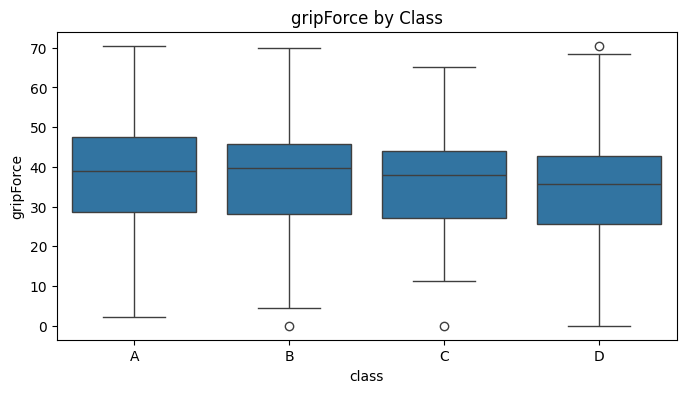

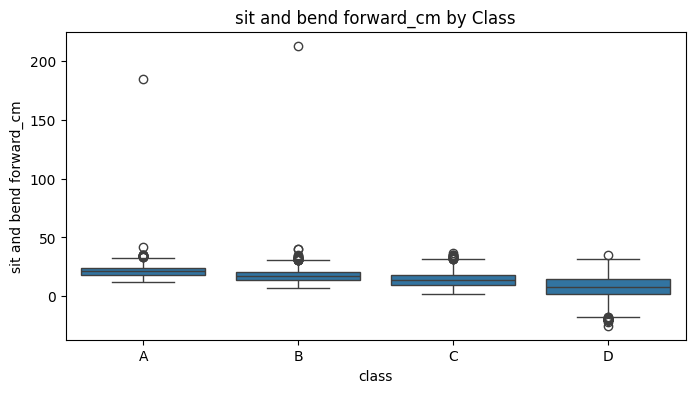

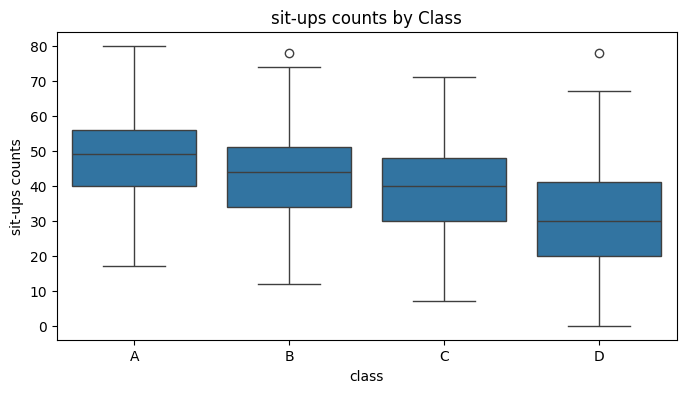

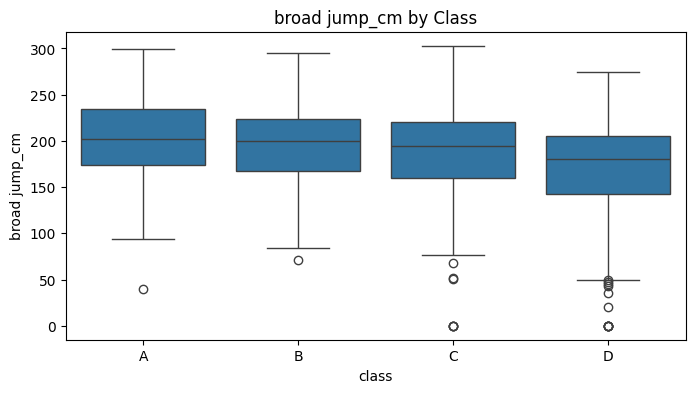

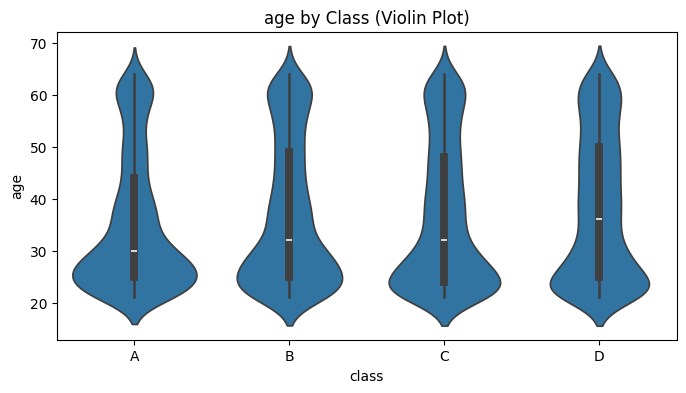

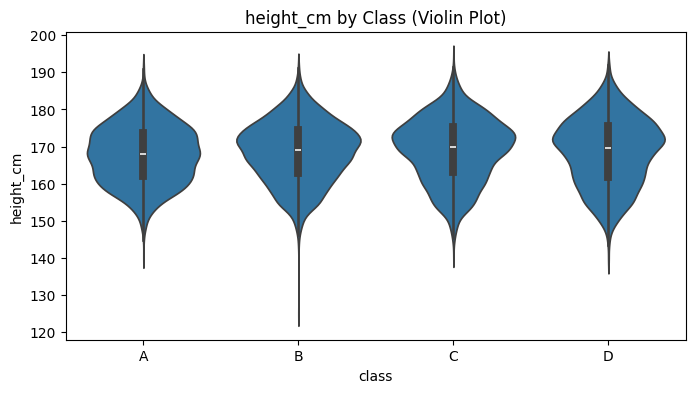

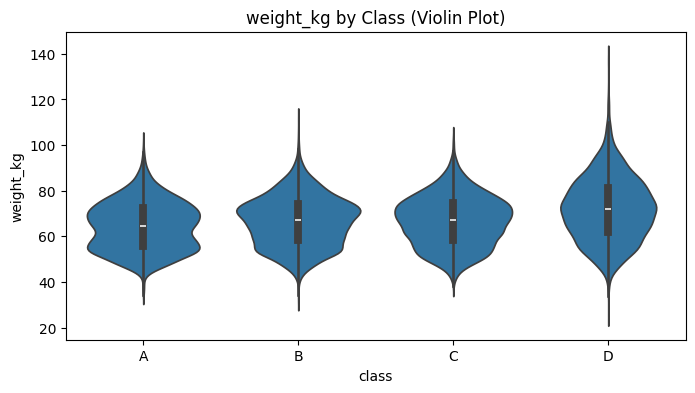

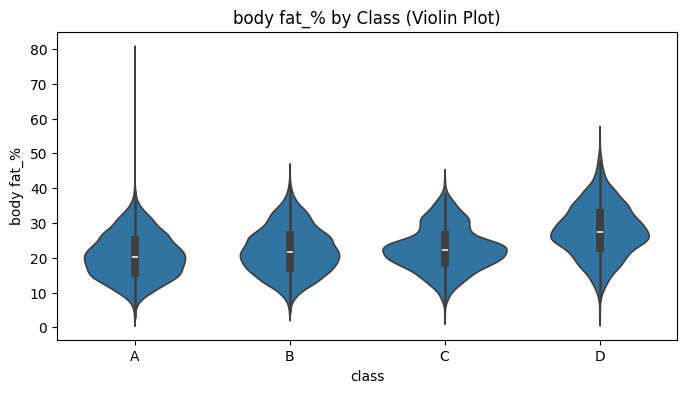

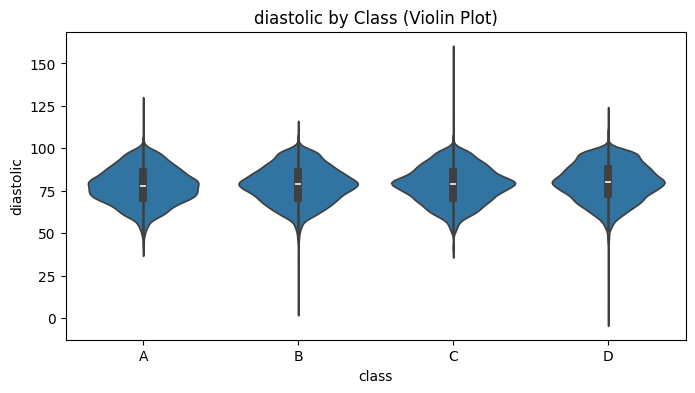

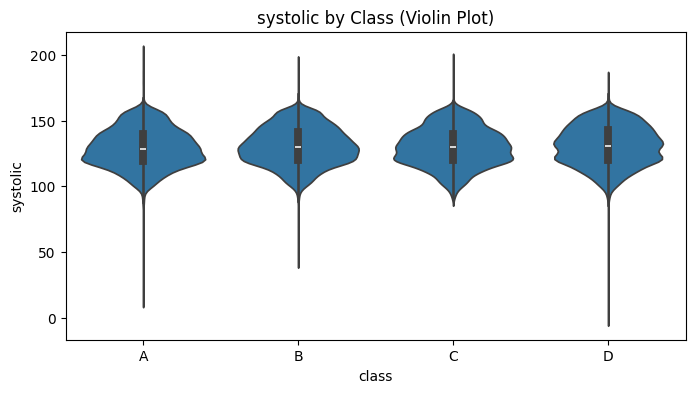

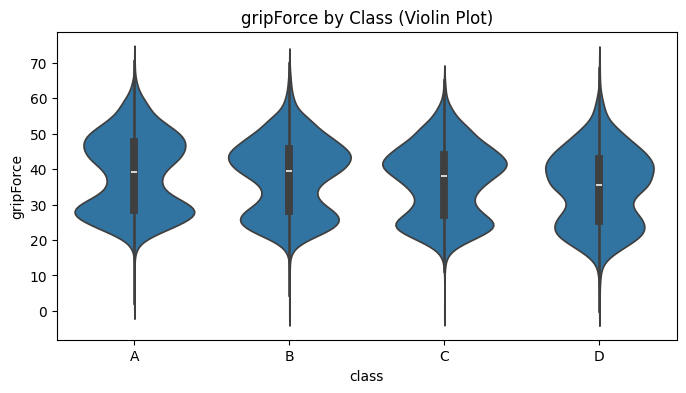

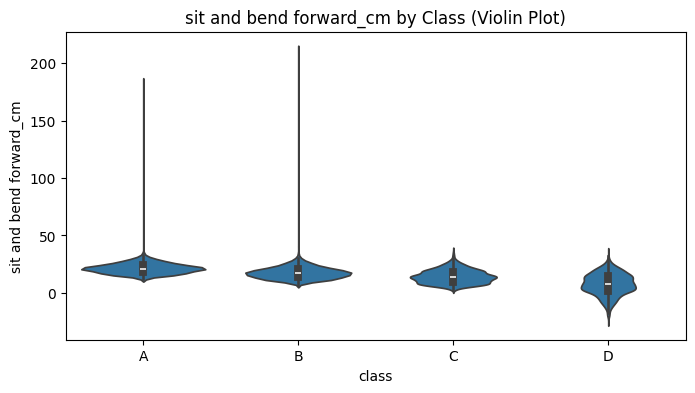

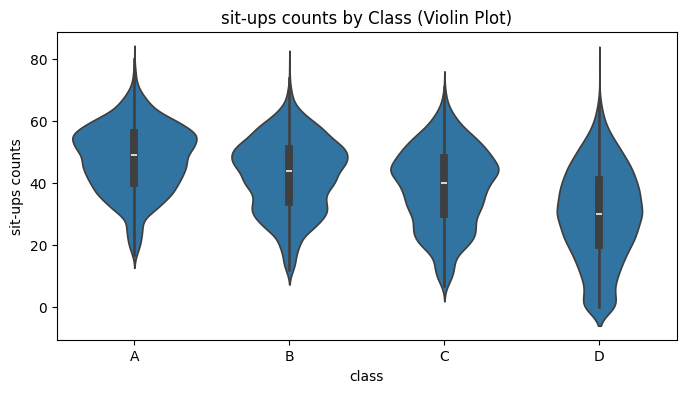

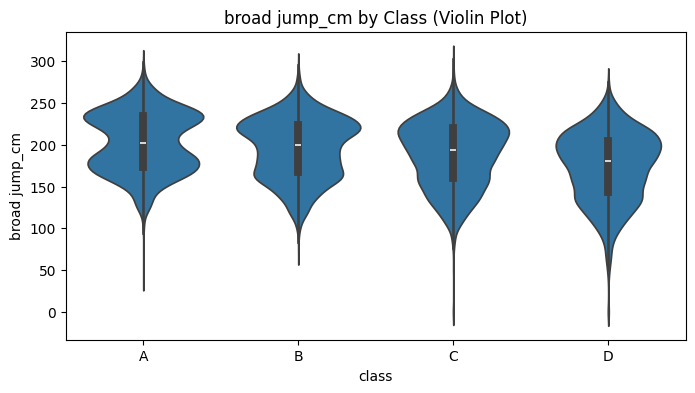

In [15]:
# Boxplots: Numerical features by class
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=col, data=df, order=sorted(df['class'].unique()))
    plt.title(f'{col} by Class')
    plt.show()

# Violin plots: richer distribution
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='class', y=col, data=df,
                   order=sorted(df['class'].unique()))
    plt.title(f'{col} by Class (Violin Plot)')
    plt.show()

# 5. Pairwise Feature Relationships

Correlation matrix: Strong positive correlation between height_cm and weight_kg, as expected. Moderate correlations among performance features.

Pairplots: For selected features, class A samples cluster at higher values for performance metrics, while class D clusters at lower values.

Interpretation:

Some features are redundant (e.g., height and weight), but each may still contribute unique information.

Classes are partially separable in feature space, especially using physical performance features.

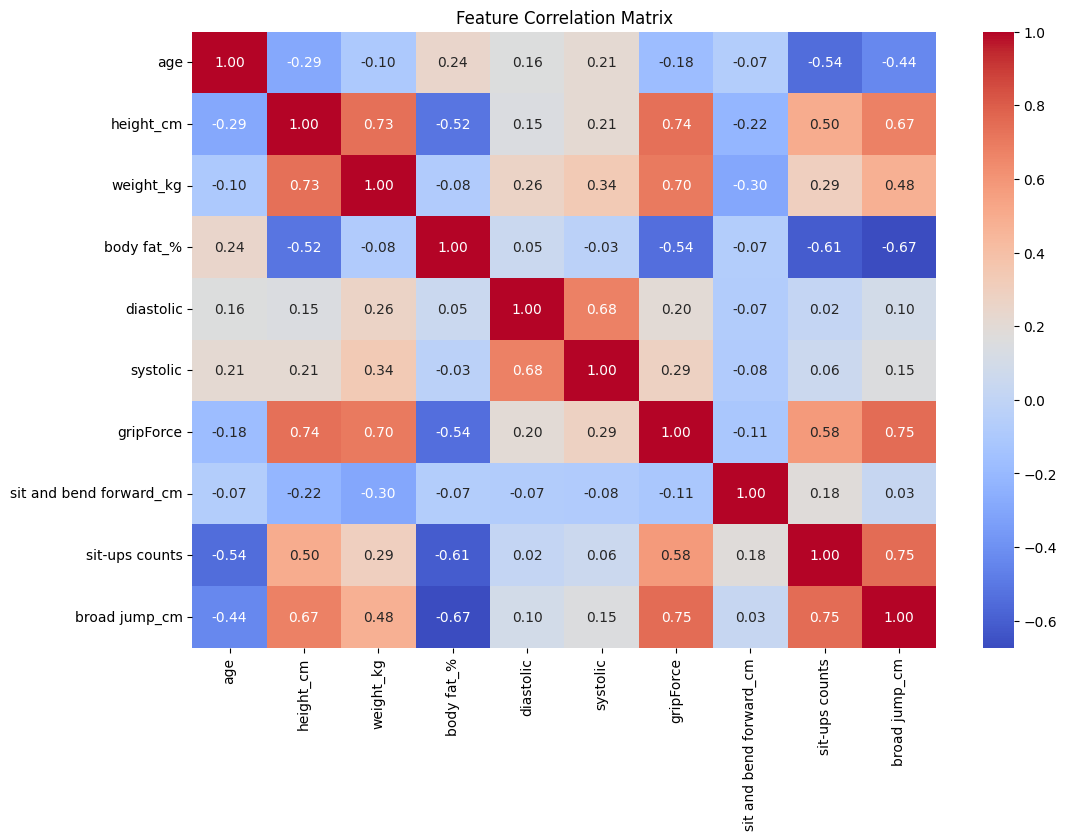

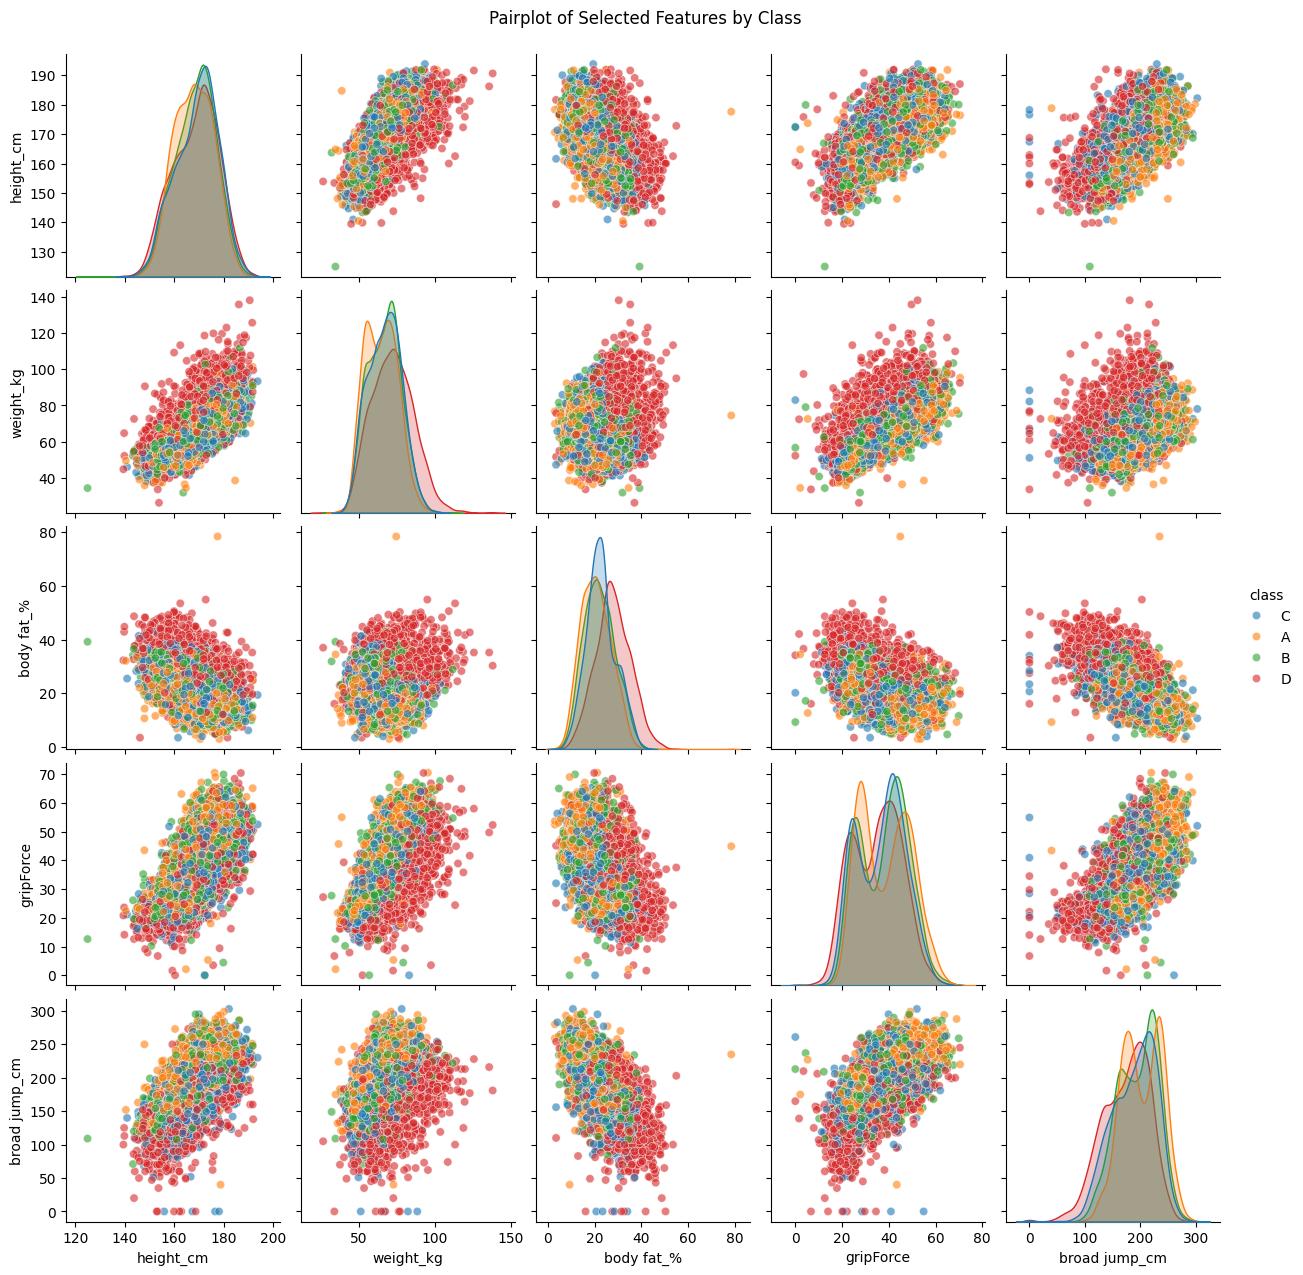

In [17]:
# Correlation matrix
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Pairplot for selected features (choose 4-5 informative ones)
selected = ['height_cm', 'weight_kg',
            'body fat_%', 'gripForce', 'broad jump_cm']
sns.pairplot(df[selected + ['class']], hue='class', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Selected Features by Class', y=1.02)
plt.show()

# 6. Outlier and Data Quality Analysis

Some rows have negative values for sit and bend forward_cm (flexibility), which may be valid if the measurement allows for negative scores.

No impossible values (e.g., negative age or weight) are present.

Duplicate rows are rare.

Interpretation:

Outliers should be documented and possibly flagged, but not removed unless confirmed as errors.

Data quality is generally good.

In [18]:
# Check for negative or impossible values in key features
print(df[num_cols].min())

# List rows with negative or suspicious values, e.g., 'sit and bend forward_cm'
outliers = df[df['sit and bend forward_cm'] < 0]
display(outliers)

age                         21.0
height_cm                  125.0
weight_kg                   26.3
body fat_%                   3.0
diastolic                    0.0
systolic                     0.0
gripForce                    0.0
sit and bend forward_cm    -25.0
sit-ups counts               0.0
broad jump_cm                0.0
dtype: float64


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
33,30.0,M,172.1,79.50,26.70000,91.0,148.0,34.7,-2.0,40.0,192.0,D
47,26.0,M,172.1,66.10,24.90000,62.0,102.0,19.9,-9.9,44.0,159.0,D
75,22.0,M,171.9,78.46,22.90000,64.0,116.0,43.6,-9.3,46.0,219.0,D
139,22.0,M,180.3,91.70,32.10000,75.0,134.0,28.6,-6.9,36.0,210.0,D
248,61.0,M,171.6,86.40,28.70000,70.0,142.0,35.1,-2.4,12.0,162.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...
13280,26.0,M,173.5,68.70,15.16476,78.0,120.0,44.7,-8.6,50.0,200.0,D
13301,26.0,M,175.4,74.70,18.20000,93.0,150.0,37.7,-6.8,53.0,215.0,D
13318,25.0,M,187.9,94.90,19.40000,68.0,107.0,33.9,-8.7,26.0,221.0,D
13357,56.0,M,173.0,52.60,12.90000,92.0,141.0,32.6,-13.2,31.0,198.0,D


# 7. Feature Engineering Opportunities

BMI calculation: Adding BMI (weight/height²) shows a distribution similar to body fat percentage, with higher BMI in lower classes.

Interaction terms: Multiplying gripForce by sit-ups counts creates a new feature that may further separate classes.

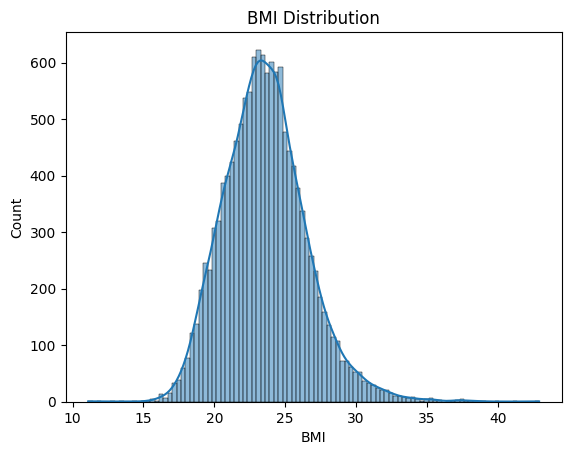

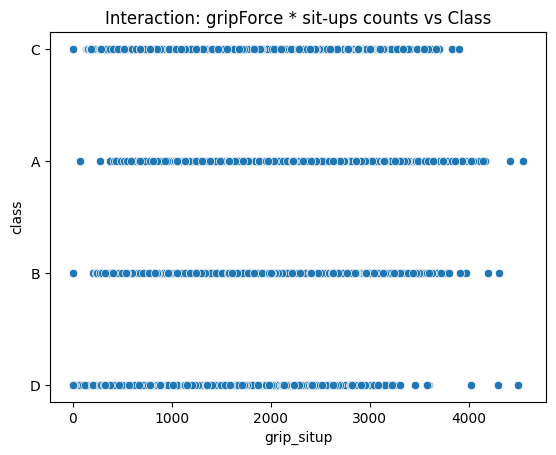

In [19]:
# Example: Add BMI as a new feature (if justified)
df['BMI'] = df['weight_kg'] / ((df['height_cm']/100) ** 2)

# Check new feature distribution
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')
plt.show()

# Interaction term example: gripForce * sit-ups counts
df['grip_situp'] = df['gripForce'] * df['sit-ups counts']
sns.scatterplot(x='grip_situp', y='class', data=df)
plt.title('Interaction: gripForce * sit-ups counts vs Class')
plt.show()

# 8. Feature Importance Pre-Assessment
Mutual information plot: Features like gripForce, sit-ups counts, broad jump_cm, and body fat_% have the highest mutual information with class.

Features like diastolic and systolic have low importance.

Interpretation:

The most important features for predicting class are those directly related to physical performance.




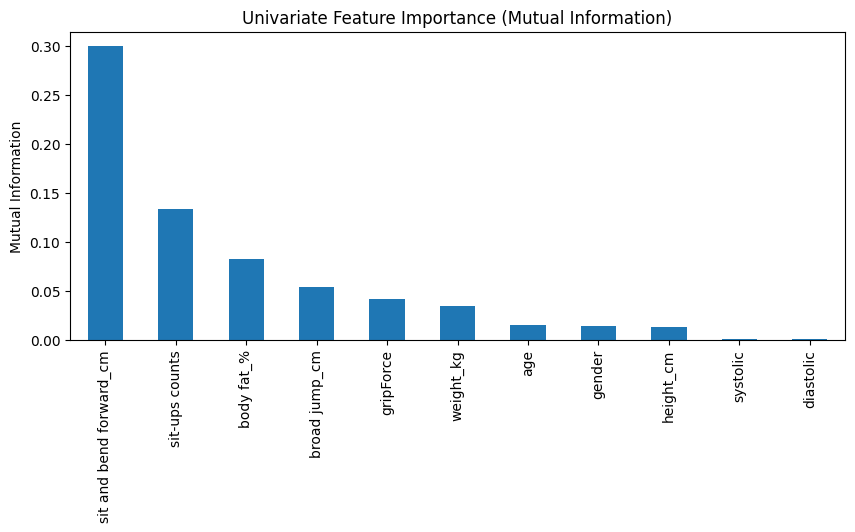

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Encode target and categorical features
df_encoded = df.copy()
df_encoded['gender'] = LabelEncoder().fit_transform(df_encoded['gender'])
df_encoded['class'] = LabelEncoder().fit_transform(df_encoded['class'])

# Compute mutual information
mi = mutual_info_classif(
    df_encoded[num_cols + ['gender']], df_encoded['class'])
mi_series = pd.Series(mi, index=num_cols +
                      ['gender']).sort_values(ascending=False)

# Plot feature importances
mi_series.plot(kind='bar', figsize=(10, 4))
plt.title('Univariate Feature Importance (Mutual Information)')
plt.ylabel('Mutual Information')
plt.show()

# 9. Multivariate Visualization

PCA plot: When projecting the data into two principal components, classes show partial separation, especially class A vs. D.

Interpretation:

The data is not perfectly separable, but there is enough structure that a classifier should be able to distinguish classes reasonably well.

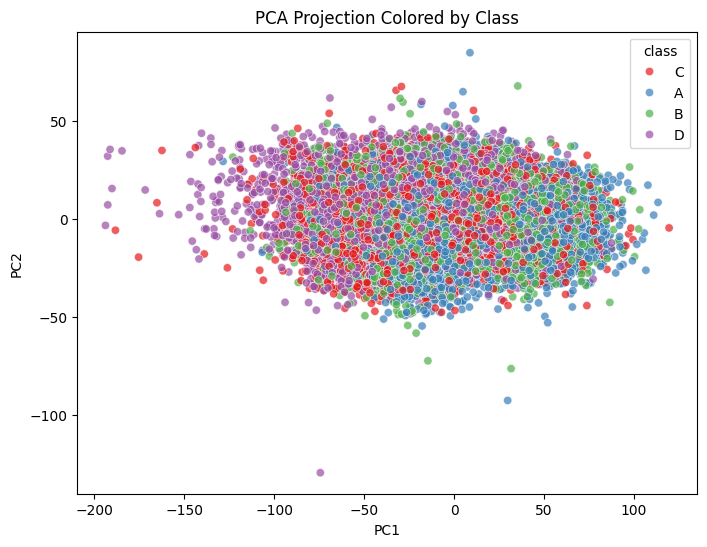

In [21]:
from sklearn.decomposition import PCA

# PCA for 2D visualization
X = df_encoded[num_cols + ['gender']]
y = df['class']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title('PCA Projection Colored by Class')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 10. Summary Table of Key Findings

A table summarizing each feature’s range, mean, standard deviation, missing values, and number of outliers.

Interpretation:

This table provides a quick reference for which features are most promising for classification and which may need further cleaning or transformation.

Categorical Encoding
Gender: Now encoded as 1 (M) and 0 (F). This allows models to use gender as a numeric feature.

Class: Now encoded as 3 (A), 2 (B), 1 (C), 0 (D), reflecting the natural order of performance. This preserves the ordinal relationship and is the best practice for ordered categories.

Key Takeaways for Your Presentation
The dataset is clean and well-structured, with moderate class imbalance.

The most important features for predicting performance class are physical performance metrics (grip force, sit-ups, broad jump, body fat %).

Outliers exist but are mostly plausible; document them rather than remove.

Feature engineering (BMI, interaction terms) can enhance model performance.

Categorical variables have been encoded appropriately for machine learning.

In [ ]:
#  convert gender column into numeric values
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

class_map = {'A': 3, 'B': 2, 'C': 1, 'D': 0}
df['class'] = df['class'].map(class_map)

In [26]:

# Example: Summarize findings for each feature
summary = pd.DataFrame({
    'Feature': num_cols + ['gender'],
    'Min': df[num_cols + ['gender']].min().values,
    'Max': df[num_cols + ['gender']].max().values,
    'Mean': df[num_cols + ['gender']].mean().values,
    'Std': df[num_cols + ['gender']].std().values,
    'Missing': df[num_cols + ['gender']].isnull().sum().values,
    'Outliers': [((df[col] < (df[col].quantile(0.25) - 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25)))) |
                  (df[col] > (df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25))))).sum()
                 for col in num_cols + ['gender']]
})
display(summary)


,Feature,Min,Max,Mean,Std,Missing,Outliers
0,age,21.0,64.0,36.775106,13.625639,0,0
1,height_cm,125.0,193.8,168.559807,8.426583,0,10
2,weight_kg,26.3,138.1,67.447316,11.949666,0,83
3,body fat_%,3.0,78.4,23.240165,7.256844,0,77
4,diastolic,0.0,156.2,78.796842,10.742033,0,54
5,systolic,0.0,201.0,130.234817,14.713954,0,29
6,gripForce,0.0,70.5,36.963877,10.624864,0,3
7,sit and bend forward_cm,-25.0,213.0,15.209268,8.456677,0,409
8,sit-ups counts,0.0,80.0,39.771224,14.276698,0,0
9,broad jump_cm,0.0,303.0,190.129627,39.868000,0,57
